# Prediktiv analyse
Formålet med predikativ analyse er å finne trender for å kunne prediktere fremtidige resultater. Dette gjør man ved å implementere regresjon.

Første steg er å forberede dataene ved å identifisere relevante fukjoner og målvariabler. Man må også håndteere mangdlende verdier og se hvordan det kan påvirke modellenes nøyaktighet. 

Andre steg er å trene regresjonsmodellen på de rensede dataene og evaluere ytelsen. 


#### Manglende verdier
Forbreding og rensing av dataen er allerede en stor del av oppgaven. Datasettet er defor allerede veldig rent og vi har allerede definerte metoder på hvordan vi skal rense et datasett. For da å se nærmere på akuratt hvordan manglende data blir håndtert og hvordan det påvirker videre resultater kan man derfor se på spesifike verdier. 

Vi kan se på to forskjellige data punkt, middeltemp og nedbør. Her tar vi de første 200 linjene med data fra datasettet vårt for å kunne se hvordan manglende data som blir behandlet skiller seg fra de målte dataene. 

For å få et datasett med flere NaN genererer vi nye dataframes og behandler dem med formelen replacing() fra data_cleaning.py.


In [63]:
import pandas as pd
import os
import sys 
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_preparation.data_cleaning import DataCleaning

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")

#take relevant data from blindern_data_cleaning
def make_dataframe(data_type,frac_missing=0.35):
    df_data = df[["Tid",data_type]].head(200)

    #df_NaN = df_data.copy()
    #df_NaN.loc[:,[df_NaN.sample(frac=frac_missing).index, data_type]] = np.nan

    df_NaN = df_data.copy()
    sampled_index = df_NaN.sample(frac=frac_missing).index
    df_NaN.loc[sampled_index, data_type] = np.nan

    df_clean = df_NaN.copy()
    data_cleaner = DataCleaning(df_clean)
    df_clean = data_cleaner.replacing().df

    return (f"Originl data:\n{df_data}\nUtregnet data:\n{df_clean}\n")




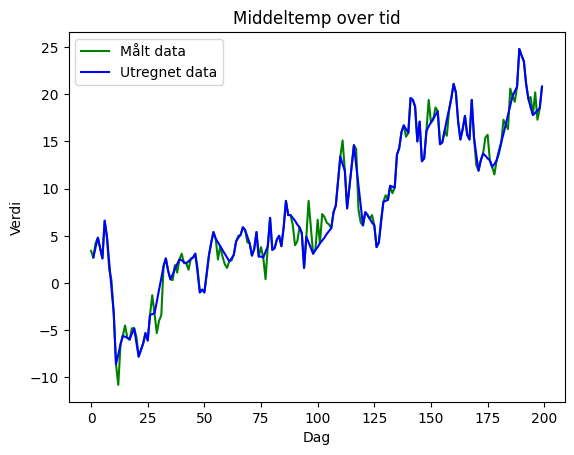

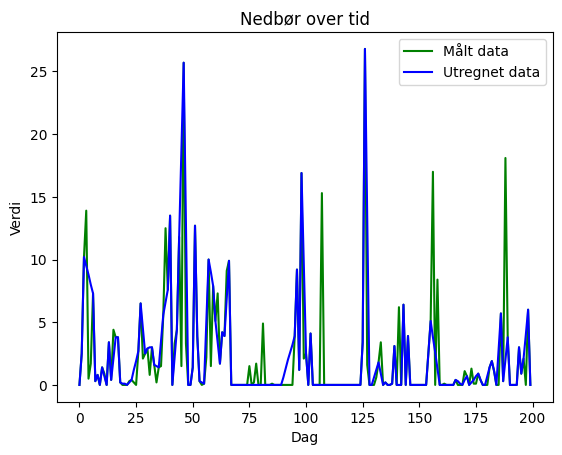

In [64]:
#plot the different dataFrames as seperate grafs
from matplotlib import pyplot as plt
def measured_calculated_plot(data_type,frac_missing=0.35):
    make_dataframe(data_type,frac_missing)

    fig,ax = plt.subplots()

    df_data[data_type].plot(ax=ax,label="Målt data",color="green")
    df_clean[data_type].plot(ax=ax,label="Utregnet data",color="blue")
    
    ax.set_title(f"{data_type} over tid")
    ax.set_ylabel("Verdi")
    ax.set_xlabel("Dag")
    plt.legend()
    plt.show()



def middeltemp_plot():
    fig, ax = plt.subplots()
    df_data["Middeltemp"].plot(ax=ax,label="Målt data", color="green")
    df_clean["Middeltemp"].plot(ax=ax, label="Utregnet", color="blue")

    ax.set_title("Middeltemperatur over tid")
    ax.set_ylabel("°C")
    ax.set_xlabel("Dag")
    plt.legend()
    plt.show()

def rain_plot():
    fig, ax = plt.subplots()
    df_data["Nedbør"].plot(ax=ax,label="Målt data", color="green")
    df_clean["Nedbør"].plot(ax=ax, label="Utregnet", color="blue")

    ax.set_title("Nedbør over tid")
    ax.set_ylabel("mm")
    ax.set_xlabel("Dag")
    plt.legend()
    plt.show()

#df_clean.plot()
#plt.show()

#middeltemp_plot()
#rain_plot()
measured_calculated_plot("Middeltemp")
measured_calculated_plot("Nedbør")
#measured_calculated_plot("Middelvind")

Som man kan se i diagrammene er begge linjediagrammene tilsvarende like. Det som siller dem er at den målte dataen har flere verdier som er utenom normalen. Dette gjør at våre data mister ekstremverdier som er utenom normalen. Dette kan påvikre forskjellige statistiske verdier som gjennomsnitt og typetall. 

In [65]:


def table(data_type,frac_missing=0.35):
    make_dataframe(data_type,frac_missing)
    
    des_data = df_data[data_type].describe().round(2)
    des_clean = df_clean[data_type].describe().round(2)
    difference = (des_data - des_clean).round(2)

    original_col = f"{data_type} (Original)"
    cleaned_col = f"{data_type} (Cleaned)"
    diff_col = f"{data_type} (Diff)"

    summary = pd.concat([
        des_data.rename(f"{data_type} (Original)"),
        des_clean.rename(f"{data_type} (Cleaned)"),
        difference.rename(f"{data_type} (Diff)"),],axis=1)

    return summary

print(table("Middeltemp"))
print(table("Nedbør"))




       Middeltemp (Original)  Middeltemp (Cleaned)  Middeltemp (Diff)
count                 200.00                199.00               1.00
mean                    7.77                  7.78              -0.01
std                     7.81                  7.68               0.13
min                   -10.80                 -8.60              -2.20
25%                     2.70                  2.75              -0.05
50%                     6.20                  5.90               0.30
75%                    14.92                 14.65               0.27
max                    24.80                 24.80               0.00
       Nedbør (Original)  Nedbør (Cleaned)  Nedbør (Diff)
count             200.00            200.00           0.00
mean                2.28              2.35          -0.07
std                 4.34              4.19           0.15
min                 0.00              0.00           0.00
25%                 0.00              0.00           0.00
50%                 0.